In [106]:
import numpy as np

import tsplib95
import networkx as nx

import os
import pandas as pd
import gilsrvnd
import DBMEA
import grasp

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression



In [107]:
# get all files from the instances folder
files = os.listdir('instances')
files

['att48.tsp',
 'berlin52.tsp',
 'bip_100_0.tsp',
 'bip_100_1.tsp',
 'bip_100_2.tsp',
 'bip_100_3.tsp',
 'bip_100_4.tsp',
 'bip_100_5.tsp',
 'bip_100_6.tsp',
 'bip_100_7.tsp',
 'bip_100_8.tsp',
 'bip_100_9.tsp',
 'bip_10_0.tsp',
 'bip_10_1.tsp',
 'bip_10_2.tsp',
 'bip_10_3.tsp',
 'bip_10_4.tsp',
 'bip_10_5.tsp',
 'bip_10_6.tsp',
 'bip_10_7.tsp',
 'bip_10_8.tsp',
 'bip_10_9.tsp',
 'bip_20_0.tsp',
 'bip_20_1.tsp',
 'bip_20_2.tsp',
 'bip_20_3.tsp',
 'bip_20_4.tsp',
 'bip_20_5.tsp',
 'bip_20_6.tsp',
 'bip_20_7.tsp',
 'bip_20_8.tsp',
 'bip_20_9.tsp',
 'bip_30_0.tsp',
 'bip_30_1.tsp',
 'bip_30_2.tsp',
 'bip_30_3.tsp',
 'bip_30_4.tsp',
 'bip_30_5.tsp',
 'bip_30_6.tsp',
 'bip_30_7.tsp',
 'bip_30_8.tsp',
 'bip_30_9.tsp',
 'bip_40_0.tsp',
 'bip_40_1.tsp',
 'bip_40_2.tsp',
 'bip_40_3.tsp',
 'bip_40_4.tsp',
 'bip_40_5.tsp',
 'bip_40_6.tsp',
 'bip_40_7.tsp',
 'bip_40_8.tsp',
 'bip_40_9.tsp',
 'bip_50_0.tsp',
 'bip_50_1.tsp',
 'bip_50_2.tsp',
 'bip_50_3.tsp',
 'bip_50_4.tsp',
 'bip_50_5.tsp',
 'bip_5

In [108]:
# create a dict that will be turned into a dataframe later the keys should be:
# file, n, m, ratio1, ratio2, density, min, max, mean, median, Q25, Q75, std, var
datadict = {'file': [], 'n': [], 'm': [], 'ratio1': [], 'ratio2': [], 'density': [], 'min': [], 'max': [], 'mean': [], 'std': [], 'var': []}

In [109]:
# for all files in the instances folder make a graph and get information such as mean, std, min, max
for f in files:
    problem = tsplib95.load('Instances/' + f)
    graph = problem.get_graph()
    dist_matrix = nx.to_numpy_matrix(graph)

    # get the number of nodes
    n = len(graph.nodes)

    # get the number of edges
    m = len(graph.edges)

    # get the ratio of nodes to edges and vice versa
    ratio1 = n/m
    ratio2 = m/n
    # get the density of the graph
    density = nx.density(graph)

    # get the min, max, mean, median, Q25, Q75, std, var of the distances
    emin = np.min(dist_matrix)
    emax = np.max(dist_matrix)

    mean = np.mean(dist_matrix)


    #Q25 = np.quantile(dist_matrix, 0.25)
    #Q75 = np.quantile(dist_matrix, 0.75)
    std = np.std(dist_matrix)

    var = np.var(dist_matrix)


    # add the information to the dict
    datadict['file'].append(f)
    datadict['n'].append(n)
    datadict['m'].append(m)
    datadict['ratio1'].append(ratio1)
    datadict['ratio2'].append(ratio2)
    datadict['density'].append(density)
    datadict['min'].append(emin)
    datadict['max'].append(emax)
    datadict['mean'].append(mean)

    #datadict['Q25'].append(Q25)
    #datadict['Q75'].append(Q75)
    datadict['std'].append(std)
    datadict['var'].append(var)

    print(f'{f} done')


att48.tsp done
berlin52.tsp done
bip_100_0.tsp done
bip_100_1.tsp done
bip_100_2.tsp done
bip_100_3.tsp done
bip_100_4.tsp done
bip_100_5.tsp done
bip_100_6.tsp done
bip_100_7.tsp done
bip_100_8.tsp done
bip_100_9.tsp done
bip_10_0.tsp done
bip_10_1.tsp done
bip_10_2.tsp done
bip_10_3.tsp done
bip_10_4.tsp done
bip_10_5.tsp done
bip_10_6.tsp done
bip_10_7.tsp done
bip_10_8.tsp done
bip_10_9.tsp done
bip_20_0.tsp done
bip_20_1.tsp done
bip_20_2.tsp done
bip_20_3.tsp done
bip_20_4.tsp done
bip_20_5.tsp done
bip_20_6.tsp done
bip_20_7.tsp done
bip_20_8.tsp done
bip_20_9.tsp done
bip_30_0.tsp done
bip_30_1.tsp done
bip_30_2.tsp done
bip_30_3.tsp done
bip_30_4.tsp done
bip_30_5.tsp done
bip_30_6.tsp done
bip_30_7.tsp done
bip_30_8.tsp done
bip_30_9.tsp done
bip_40_0.tsp done
bip_40_1.tsp done
bip_40_2.tsp done
bip_40_3.tsp done
bip_40_4.tsp done
bip_40_5.tsp done
bip_40_6.tsp done
bip_40_7.tsp done
bip_40_8.tsp done
bip_40_9.tsp done
bip_50_0.tsp done
bip_50_1.tsp done
bip_50_2.tsp done
bip

In [110]:
# turn the dict into a dataframe
df = pd.DataFrame.from_dict(datadict)
df

,file,n,m,ratio1,ratio2,density,min,max,mean,std,var
0,att48.tsp,48,1176,0.040816,24.5,1.042553,0.0,2662.0,1017.559896,627.598414,393879.768982
1,berlin52.tsp,52,1378,0.037736,26.5,1.039216,0.0,1716.0,564.188609,345.722052,119523.737355
2,bip_100_0.tsp,100,5050,0.019802,50.5,1.020202,0.0,678.0,310.541400,259.240163,67205.462286
3,bip_100_1.tsp,100,5050,0.019802,50.5,1.020202,0.0,677.0,310.369400,264.901719,70172.920944
4,bip_100_2.tsp,100,5050,0.019802,50.5,1.020202,0.0,690.0,309.285800,261.385699,68322.483718
...,...,...,...,...,...,...,...,...,...,...,...
235,random_90_9.tsp,90,4095,0.021978,45.5,1.022472,0.0,657.0,258.359259,126.441367,15987.419328
236,rat99.tsp,99,4950,0.020000,50.0,1.020408,0.0,218.0,84.137333,47.326182,2239.767488
237,rd100.tsp,100,5050,0.019802,50.5,1.020202,0.0,1334.0,550.105000,267.281077,71439.174375
238,st70.tsp,70,2485,0.028169,35.5,1.028986,0.0,129.0,51.508163,24.994320,624.716056


In [111]:
# add columns for the algorithms GRASP, GILS and DBMEA
df['GILS_cost'] = 0
df['GILS_time'] = 0
df['GRASP_cost'] = 0
df['GRASP_time'] = 0
df['DBMEA_cost'] = 0
df['DBMEA_time'] = 0

In [112]:
df

,file,n,m,ratio1,ratio2,density,min,max,mean,std,var,GILS_cost,GILS_time,GRASP_cost,GRASP_time,DBMEA_cost,DBMEA_time
0,att48.tsp,48,1176,0.040816,24.5,1.042553,0.0,2662.0,1017.559896,627.598414,393879.768982,0,0,0,0,0,0
1,berlin52.tsp,52,1378,0.037736,26.5,1.039216,0.0,1716.0,564.188609,345.722052,119523.737355,0,0,0,0,0,0
2,bip_100_0.tsp,100,5050,0.019802,50.5,1.020202,0.0,678.0,310.541400,259.240163,67205.462286,0,0,0,0,0,0
3,bip_100_1.tsp,100,5050,0.019802,50.5,1.020202,0.0,677.0,310.369400,264.901719,70172.920944,0,0,0,0,0,0
4,bip_100_2.tsp,100,5050,0.019802,50.5,1.020202,0.0,690.0,309.285800,261.385699,68322.483718,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,random_90_9.tsp,90,4095,0.021978,45.5,1.022472,0.0,657.0,258.359259,126.441367,15987.419328,0,0,0,0,0,0
236,rat99.tsp,99,4950,0.020000,50.0,1.020408,0.0,218.0,84.137333,47.326182,2239.767488,0,0,0,0,0,0
237,rd100.tsp,100,5050,0.019802,50.5,1.020202,0.0,1334.0,550.105000,267.281077,71439.174375,0,0,0,0,0,0
238,st70.tsp,70,2485,0.028169,35.5,1.028986,0.0,129.0,51.508163,24.994320,624.716056,0,0,0,0,0,0


In [113]:
# create a function that can be used via df.apply that runs the 3 algorithmms on the given file from the row

def benchmark(row):
    # get the file
    f = row['file']

    _, gils_cost, gils_time = gilsrvnd.run(f)
    _, grasp_cost, grasp_time = grasp.run(f)
    _, dbmea_cost, dbmea_time = DBMEA.run(f)

    # add the results to the dataframe

    row['GRASP_cost'] = grasp_cost
    row['GRASP_time'] = grasp_time

    row['GILS_cost'] = gils_cost
    row['GILS_time'] = gils_time
    row['DBMEA_cost'] = dbmea_cost
    row['DBMEA_time'] = dbmea_time

    print(f'{f} done')

    return row


In [114]:
# run the benchmark function on all rows
# df = df.apply(benchmark, axis=1)


In [115]:
# save the dataframe as a csv
# df.to_csv('data_bip.csv', index=False)
# matrix = df.copy()
# c = ["GILS_cost", "GRASP_cost", "DBMEA_cost"]
# matrix[c] = matrix[c].apply(lambda x: pd.to_numeric(x, errors='coerce'))

# matrix['Min_val'] = matrix[c].min(axis=1)
# matrix['Min_col'] = matrix[c].idxmin(axis=1)
#save the dataframe as a csv
# matrix.to_csv('matrix_bip.csv', index=False)

In [116]:
# train a model on the data that predicts gils
# get the data
df = pd.read_csv('matrix_all.csv')
df

,file,n,m,ratio1,ratio2,density,min,max,mean,std,var,GILS_cost,GILS_time,GRASP_cost,GRASP_time,DBMEA_cost,DBMEA_time,Min_val,Min_col
0,att48.tsp,48,1176,0.040816,24.5,1.042553,0.0,2662.0,1017.559896,627.598414,3.938798e+05,226229.0,6.474685,301702.0,0.026019,207771.0,5.288543,207771.0,DBMEA_cost
1,berlin52.tsp,52,1378,0.037736,26.5,1.039216,0.0,1716.0,564.188609,345.722052,1.195237e+05,145419.0,6.054587,191072.0,0.031533,143278.0,5.374160,143278.0,DBMEA_cost
2,brazil58.tsp,58,1711,0.033898,29.5,1.035088,0.0,8700.0,2094.914388,1426.139588,2.033874e+06,532454.0,8.013889,709540.0,0.043413,535150.0,9.045840,532454.0,GILS_cost
3,burma14.tsp,14,105,0.133333,7.5,1.153846,1.0,1261.0,442.612245,272.511473,7.426250e+04,16457.0,0.156218,18393.0,0.001000,16457.0,0.082072,16457.0,GILS_cost
4,dantzig42.tsp,42,903,0.046512,21.5,1.048780,0.0,192.0,72.295918,43.481585,1.890648e+03,12392.0,2.579336,14523.0,0.016044,12256.0,3.325098,12256.0,DBMEA_cost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,bip_90_5.tsp,90,4095,0.021978,45.5,1.022472,0.0,695.0,308.707160,259.409989,6.729354e+04,77968.0,28.094806,117890.0,0.150729,75154.0,32.575500,75154.0,DBMEA_cost
236,bip_90_6.tsp,90,4095,0.021978,45.5,1.022472,0.0,694.0,307.900988,259.775403,6.748326e+04,75074.0,27.989268,110798.0,0.151507,69990.0,28.058020,69990.0,DBMEA_cost
237,bip_90_7.tsp,90,4095,0.021978,45.5,1.022472,0.0,684.0,306.894321,258.083750,6.660722e+04,71876.0,25.897070,112158.0,0.153674,67970.0,38.102861,67970.0,DBMEA_cost
238,bip_90_8.tsp,90,4095,0.021978,45.5,1.022472,0.0,682.0,307.158519,258.822485,6.698908e+04,67313.0,26.436357,107017.0,0.152258,68754.0,29.475499,67313.0,GILS_cost


In [117]:
# check value counts
df['Min_col'].value_counts()

Min_col
DBMEA_cost    147
GILS_cost      93
Name: count, dtype: int64

In [118]:
# get the features
X = df[['n', 'm', 'ratio1', 'ratio2', 'density', 'min', 'max', 'mean', 'std', 'var']]
y = df['Min_col']



In [119]:
# train test split


X_train, X_test, y_train, y_test = train_test_split(X, y)



In [120]:
# train a random forest

rf = RandomForestClassifier()
rf.fit(X_train, y_train)



RandomForestClassifier()

In [121]:
# get the predictions
y_pred = rf.predict(X_test)



In [122]:
# get the accuracy
accuracy_score(y_test, y_pred)


0.6333333333333333

In [123]:
# get the confusion matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(29, 7, 15, 9)

In [124]:
# predict the entire dataset
y_pred = rf.predict(X)


In [125]:
# get the accuracy
accuracy_score(y, y_pred)


0.9083333333333333

In [126]:
# get the confusion matrix
tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
(tn, fp, fn, tp)

(140, 7, 15, 78)

In [127]:
# now train a logistic regression

lr = LogisticRegression()
lr.fit(X_train, y_train)


LogisticRegression()

In [128]:
# get the predictions
y_pred = lr.predict(X_test)


In [129]:
# get the accuracy
accuracy_score(y_test, y_pred)

0.4

In [130]:
# get the confusion matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(0, 36, 0, 24)

In [131]:
#get the predictions for the entire dataset
y_pred = lr.predict(X)


In [132]:
# get the accuracy
accuracy_score(y, y_pred)

0.3875

In [133]:
# get the confusion matrix

In [134]:
tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
(tn, fp, fn, tp)

(0, 147, 0, 93)

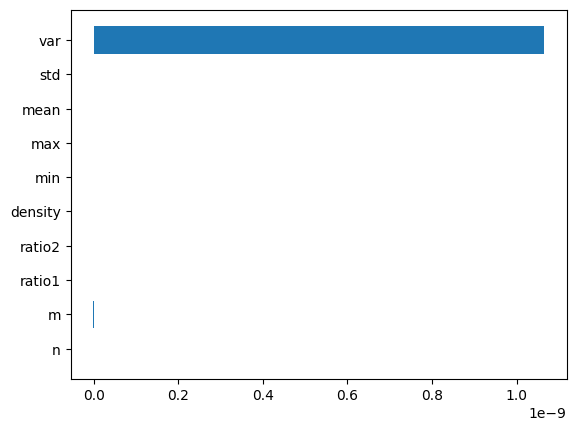

In [135]:
# display the logistic regression
import matplotlib.pyplot as plt
plt.barh(X.columns, lr.coef_[0])
plt.show()

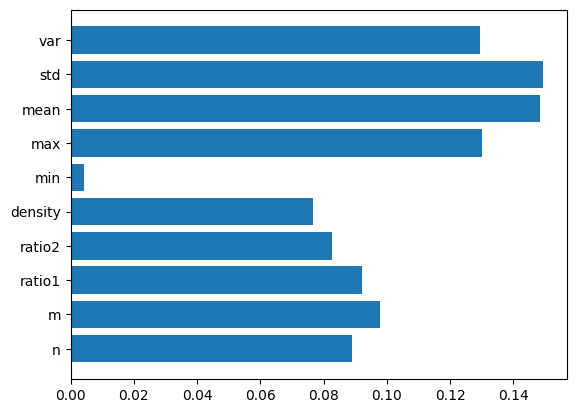

In [136]:
# display the random forest
plt.barh(X.columns, rf.feature_importances_)
plt.show()